In [33]:
import tensorflow as tf
from tensorflow import keras

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [34]:
X_train_full.shape

(60000, 28, 28)

In [35]:
y_train_full.shape

(60000,)

In [36]:
X_train_full.dtype

dtype('uint8')

In [37]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

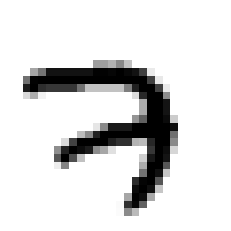

In [38]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [39]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

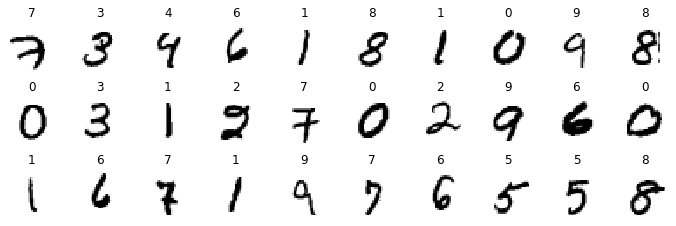

In [40]:
rows = 3
cols = 10
plt.figure(figsize=(cols*1.2, rows*1.2))
for row in range(rows):
    for col in range(cols):
        index = cols*row + col
        plt.subplot(rows, cols, index+1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [41]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [42]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [43]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=3e-1), metrics=["accuracy"])
expon_learning_rate = ExponentialLearningRate(factor=1.005)

In [44]:
import os

run_index = 3 # 실행할 때마다 이 값을 늘립니다
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_003'

In [45]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2313 - accuracy: 0.9274 - val_loss: 0.1516 - val_accuracy: 0.9474
Epoch 2/100
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0993 - accuracy: 0.9699 - val_loss: 0.0947 - val_accuracy: 0.9736
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0672 - accuracy: 0.9783 - val_loss: 0.0766 - val_accuracy: 0.9774
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0478 - accuracy: 0.9846 - val_loss: 0.0708 - val_accuracy: 0.9816
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.0669 - val_accuracy: 0.9810
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0299 - accuracy: 0.9903 - val_loss: 0.0763 - val_accuracy: 0.9782
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0244 - accuracy: 0.9918 - val_loss: 0.0656 - val_ac

In [46]:
model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 856us/step - loss: 0.0669 - accuracy: 0.9810


[0.06690916419029236, 0.9810000061988831]

In [47]:
%tensorboard --logdir=./my_mnist_logs --port=6007

UsageError: Line magic function `%tensorboard` not found.
